# Import necessary libraries


Library Imports: Import the required libraries for data manipulation, machine learning, and visualization.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from sklearn.metrics import silhouette_score

# Load Iris Dataset
Load Iris Dataset: Load the Iris dataset from the scikit-learn library.

In [2]:
iris = datasets.load_iris()

Print the target names (species of iris)

In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


# Data Preparation: 


Create a DataFrame for the features (x) and the target variable (y)

In [4]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

 Display basic information about the dataset

In [5]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Exploration: 
Display basic information about the dataset, such as target names, the first few rows of features, and the shape of the features DataFrame.


In [6]:
x.shape # Display the shape of the features DataFrame

(150, 4)

In [7]:
y.value_counts() # Display the counts of each target variable

Target
0         50
1         50
2         50
dtype: int64

# Data Visualization - Scatter Plots

 Visualize the Sepal Length vs Sepal Width and Petal Length vs Petal Width using scatter plots with different colors for each iris species.

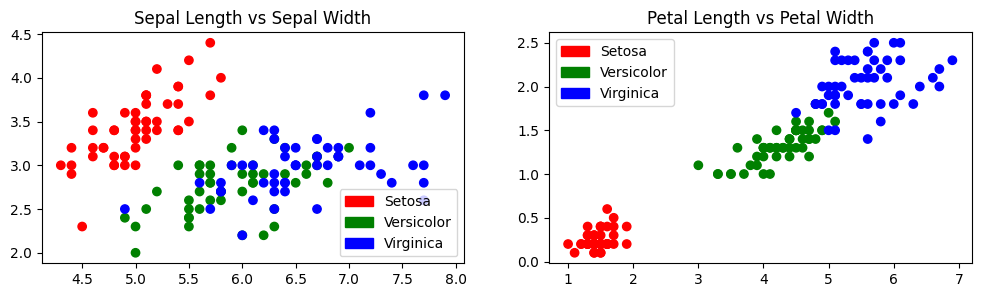

In [8]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Elbow Method for Optimal K

Implement the Elbow Method to find the optimal number of clusters (k) for KMeans. Plot the Elbow Method curve to visually identify the optimal k.

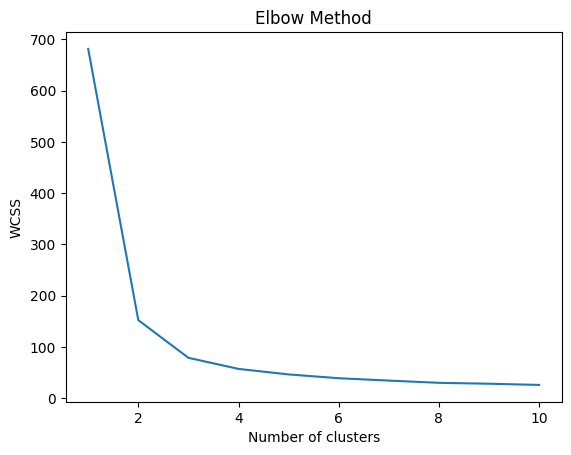

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans Clustering
 Fit the KMeans model with the chosen number of clusters (3) based on the Elbow Method

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(x)) #scaling the data
scaled_data.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
# Fit KMeans model with 3 clusters (chosen from the Elbow Method)
iris_k_mean_model = KMeans(n_clusters=3,n_init="auto")
iris_k_mean_model.fit(x)

KMeans(n_clusters=3, n_init='auto')

# Model Evaluation - Scatter Plots

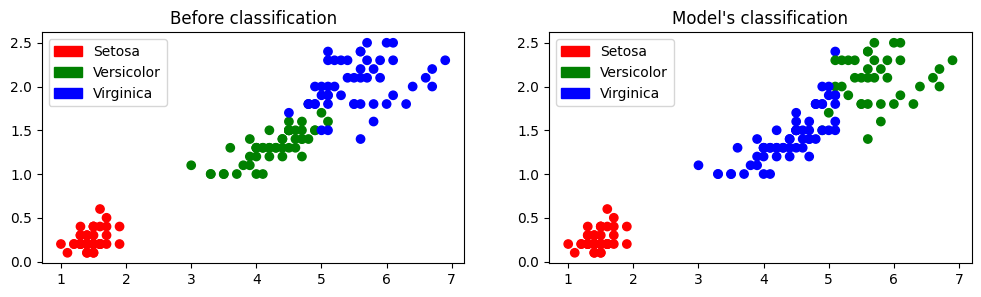

In [12]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

# Plot original classification
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Plot model's classification
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Model Evaluation - Accuracy Score

In [13]:
sm.accuracy_score(predictedY, y['Target'])

0.44

# Silhouette Score Calculation

In [14]:
silhouette_avg = silhouette_score(x, iris_k_mean_model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5528190123564095
